# №1

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings

warnings.filterwarnings('ignore')

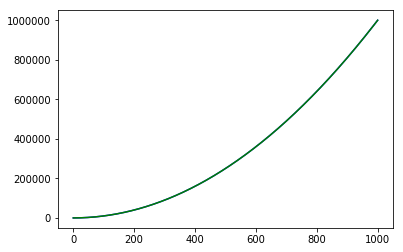

In [3]:
t = np.arange(0., 1000., 0.2)
plt.plot(t, t**2, 'b', t+0.01, t**2, 'g')
plt.show()

In [4]:
first_x = t
first_y = t**2

second_x = t+0.01
second_y = t**2

In [5]:
ones = []
for i in range(len(first_x)):
    ones.append(1)
ones = np.array(ones)

twos = []
for i in range(len(second_x)):
    twos.append(2)
twos = np.array(twos)

In [6]:
data_1 = list(zip(first_x, first_y, ones))
data_2 = list(zip(second_x, second_y, twos))
data = np.concatenate((data_1, data_2))

In [7]:
df = pd.DataFrame(data)
df[:5]

,0,1,2
0,0.0,0.00,1.0
1,0.2,0.04,1.0
2,0.4,0.16,1.0
3,0.6,0.36,1.0
4,0.8,0.64,1.0


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[[0, 1]], df[2], test_size=0.25, random_state=23)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=23)

#### KNeighborsClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(1, 50)}, cv=5, verbose=1).fit(X_valid, [round(x) for x in y_valid])

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:   21.7s finished


In [10]:
#Tuning n_neighbors parameter
best = knn.best_params_
print("The best parameters: ", best)

The best parameters:  {'n_neighbors': 43}


In [11]:
best_knn = KNeighborsClassifier(n_neighbors=43)
best_knn.fit(X_train, [round(x) for x in y_train])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=43, p=2,
           weights='uniform')

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
y_pred_knn = best_knn.predict(X_test)
res = accuracy_score([round(x) for x in y_test], y_pred_knn)
print("KNN score:", res)

KNN score: 0.45


#### LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression

lr = GridSearchCV(LogisticRegression(), {'C': [0.001,0.01,0.1,1,10,100]}, cv=5, verbose=1).fit(X_valid, [round(x) for x in y_valid])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [15]:
best = lr.best_params_
print("The best parameters: ", best)

The best parameters:  {'C': 0.001}


In [16]:
best_lr = LogisticRegression(C=0.001)
best_lr.fit(X_train, [round(x) for x in y_train])

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_pred_lr = best_lr.predict(X_test)
res = accuracy_score([round(x) for x in y_test], y_pred_lr)
print("LR score:", res)

LR score: 0.5044


Итак, KNeighborsClassifier (тюнилось количество соседей) показал результат 0.45, в то время как LogisticRegression (тюнился C-параметр) - 0.5. Первый метод показал себя хуже, судя по всему потому, что модели сложнее найти два разных класса, так как графики использовавшихся датасетов налегают друг на друга - их точки практически совпадают. В то же время, для логической регрессии провести классификацию значительно легче, так как функции легко разделяются прямой.

# №2

No handles with labels found to put in legend.


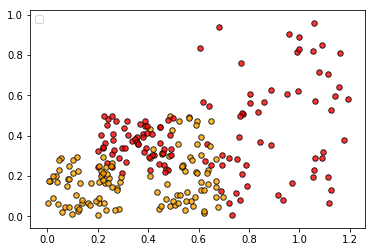

In [18]:
# Create data
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.2 + 0.3*np.random.rand(N), 0.2 + 0.3*np.random.rand(N))
g4 = (0.3*np.random.rand(N),0.3*np.random.rand(N))

#Showing 2 classes
data = (g1, g2, g3, g4)
colors = ("red", "orange", "red", "orange")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color in zip(data, colors):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='black', s=30)

plt.legend(loc=2)
plt.show()

In [19]:
first_x2 = np.concatenate((g1[0], g3[0]))
first_y2 = np.concatenate((g1[1], g3[1]))

second_x2 = np.concatenate((g2[0], g4[0]))
second_y2 = np.concatenate((g2[1], g4[1]))

In [20]:
ones2 = []
for i in range(len(first_x2)):
    ones2.append(1)
ones2 = np.array(ones2)

twos2 = []
for i in range(len(second_x2)):
    twos2.append(2)
twos2 = np.array(twos2)

In [21]:
data_1_2 = list(zip(first_x2, first_y2, ones2))
data_2_2 = list(zip(second_x2, second_y2, twos2))
data_2 = np.concatenate((data_1_2, data_2_2))

In [22]:
df2 = pd.DataFrame(data_2)
df2[:5]

,0,1,2
0,0.751332,0.282313,1.0
1,1.059932,0.290382,1.0
2,0.777307,0.509647,1.0
3,0.606998,0.835968,1.0
4,0.805523,0.608078,1.0


In [23]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2[[0, 1]], df2[2], test_size=0.25, random_state=23)
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_train2, y_train2, test_size=0.25, random_state=23)

#### KNeighborsClassifier

In [24]:
knn = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(1, 30)}, cv=5, verbose=1).fit(X_valid2, [round(x) for x in y_valid2])

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    1.1s finished
c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
#Tuning n_neighbors parameter
best = knn.best_params_
print("The best parameters: ", best)

The best parameters:  {'n_neighbors': 4}


In [26]:
best_knn = KNeighborsClassifier(n_neighbors=4)
best_knn.fit(X_train2, [round(x) for x in y_train2])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [27]:
y_pred_knn = best_knn.predict(X_test2)
res = accuracy_score([round(x) for x in y_test2], y_pred_knn)
print("KNN score:", res)

KNN score: 0.8333333333333334


#### LogisticRegression

In [28]:
lr = GridSearchCV(LogisticRegression(), {'C': [0.001,0.01,0.1,1,10,100]}, cv=5, verbose=1).fit(X_valid2, [round(x) for x in y_valid2])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
best = lr.best_params_
print("The best parameters: ", best)

The best parameters:  {'C': 100}


In [30]:
best_lr = LogisticRegression(C=100)
best_lr.fit(X_train2, [round(x) for x in y_train2])

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred_lr = best_lr.predict(X_test2)
res = accuracy_score([round(x) for x in y_test2], y_pred_lr)
print("LR score:", res)

LR score: 0.75


Итак, KNeighborsClassifier (тюнилось количество соседей) показал результат 0.83, в то время как LogisticRegression (тюнился C-параметр) - 0.75. В этот раз, как и задумывалось, лучше показал себя kNN метод. В использовавшемся датасете классы разбиты так, что между ними никак не проведешь разграничительную линию - поэтому LR метод справился хуже.

# №3

In [32]:
x_pos=np.arange(-1000, 1000, 1)
y_pos=[]

for x in range(len(x_pos)):
    x_val=x_pos[x]
    y=(x_val**2)+(2*x_val)+2
    y_pos.append(y)

In [33]:
x_pos_2=np.arange(-995, 995, 1)
y_pos_2=[]

for x in range(len(x_pos_2)):
    x_val=x_pos_2[x]
    y=(x_val**2)+(2*x_val)+2
    y_pos_2.append(y)

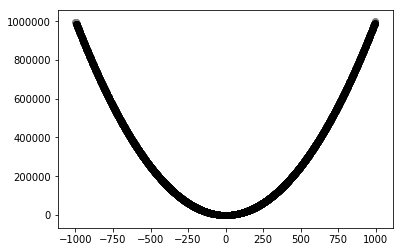

In [34]:
plt.scatter(x_pos, y_pos, color='gray')
plt.scatter(x_pos_2, y_pos_2, color='black')
plt.show()

In [35]:
ones3 = []
for i in range(len(x_pos)):
    ones3.append(1)
ones3 = np.array(ones3)

twos3 = []
for i in range(len(x_pos_2)):
    twos3.append(2)
twos3 = np.array(twos3)

In [36]:
data_1_3 = list(zip(x_pos, y_pos, ones3))
data_2_3 = list(zip(x_pos_2, y_pos_2, twos3))
data3 = np.concatenate((data_1_3, data_2_3))

In [37]:
df3 = pd.DataFrame(data3)
df3[:5]

,0,1,2
0,-1000,998002,1
1,-999,996005,1
2,-998,994010,1
3,-997,992017,1
4,-996,990026,1


In [38]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3[[0, 1]], df3[2], test_size=0.25, random_state=23)
X_train3, X_valid3, y_train3, y_valid3 = train_test_split(X_train3, y_train3, test_size=0.1, random_state=23)

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

#### k-NN with cosine distance

In [40]:
cos = GridSearchCV(KNeighborsClassifier(metric = 'cosine'), {'n_neighbors': range(1, 50)}, cv=5, verbose=1).fit(X_valid3, [round(x) for x in y_valid3])

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    4.9s finished
c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
#Tuning n_neighbors parameter
best = cos.best_params_
print("The best parameters: ", best)

The best parameters:  {'n_neighbors': 37}


In [42]:
best_cos = KNeighborsClassifier(n_neighbors=37)
best_cos.fit(X_train3, [round(x) for x in y_train3])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=37, p=2,
           weights='uniform')

In [43]:
y_pred_cos = best_cos.predict(X_test3)
res = accuracy_score([round(x) for x in y_test3], y_pred_cos)
print("Cosine distance score:", res)

Cosine distance score: 0.3967935871743487


#### k-NN with euclidean distance

In [44]:
euc = GridSearchCV(KNeighborsClassifier(metric = 'euclidean'), {'n_neighbors': range(1, 50)}, cv=5, verbose=1).fit(X_valid3, [round(x) for x in y_valid3])

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    4.8s finished
c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
#Tuning n_neighbors parameter
best = euc.best_params_
print("The best parameters: ", best)

The best parameters:  {'n_neighbors': 10}


In [46]:
best_euc = KNeighborsClassifier(n_neighbors=10)
best_euc.fit(X_train3, [round(x) for x in y_train3])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [47]:
y_pred_euc = best_euc.predict(X_test3)
res = accuracy_score([round(x) for x in y_test3], y_pred_euc)
print("Euclidean distance score:", res)

Euclidean distance score: 0.3777555110220441


В данном случае, мера косинусной близости справилась лучше евклидовой (0.39 против 0.37). Это связано с тем, что косинусный метод измеряет угол между точками в то время, как евклидова мера смотрит на расстояние между ними, а в созданном датасете расстояние между точками не играет значимой роли в определении класса.